In [65]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
# importing dataset and converting admitted variable into numerical
data=pd.read_csv("titanic-passengers.csv", sep=';')
data=data.sort_index()
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna('S',inplace=True) 
data['Cabin'].fillna('G6',inplace=True)
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})  
data["Sex"]=data["Sex"].map({"male": 1, "female": 0})  
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,3101276,7.9250,G6,S
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,358585,14.5000,G6,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,G6,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,A/5 21173,7.2500,G6,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26.0000,G6,S


In [82]:
#features extraction
x = data[['Age', 'Sex']]
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

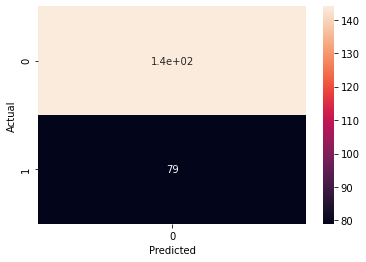

In [41]:
# Using a confusion matrix to validate our model.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [5]:
# The "ROC curve" summarizes the prediction performance of a classification model at all classification thresholds.
# Particularly , the ROC curve plots the "False Positive Rate (FPR)" ont the Y-axis.

In [53]:
#Generate synthetic dataset
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [54]:
# Add noisy features to make the problem more difficult
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [62]:
# Data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,random_state=0)

In [64]:
# Random Forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [57]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)


GaussianNB()

In [58]:
#Prediction probabilities
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [59]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [91]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [92]:
# Calculate and Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (roc_auc_score(Y_test, r_probs)))
print('Random Forest: AUROC = %.3f' % (roc_auc_score(Y_test, rf_probs)))
print('Naive Bayes: AUROC = %.3f' % (roc_auc_score(Y_test, nb_probs)))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.883
Naive Bayes: AUROC = 0.993


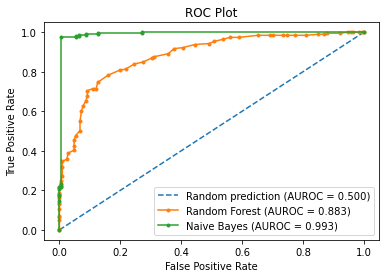

In [93]:
# plotting 
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % (roc_auc_score(Y_test, r_probs)))
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % (roc_auc_score(Y_test, rf_probs)))
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % (roc_auc_score(Y_test, nb_probs)))
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()